# TP 2 : Linear regression 

### Benjamin COHEN

In [371]:
# Change here using YOUR own first and last names
fn1 = "Benjamin"
ln1 = "Cohen"
filename = "_".join(map(lambda s: s.strip().lower(),["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

# Packages

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns

## Exercise 1

**Question 1: Prepocessing of the data**

In [373]:
#Loading the data given the path
path = './data_tp_2.csv'
data = pd.read_csv(path)
data.head()


,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2


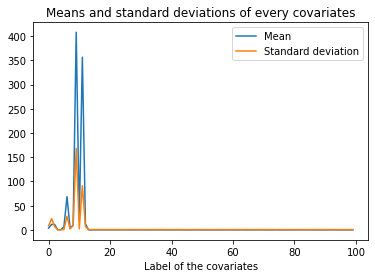

In [374]:
#Computation of the mean and standard deviation for the covariates
#During the TP our teacher told us we were meant to plot the mean instead of the median as explained in the subject.

mean = np.zeros((100))
std = np.zeros((100))

for i in range(100):  
    
    mean[i] = np.mean(data['X'+str(i)])
    std[i] = np.std(data['X'+str(i)])
    
plt.figure()
plt.plot(mean,label = "Mean")
plt.plot(std, label = 'Standard deviation')
plt.title('Means and standard deviations of every covariates')
plt.xlabel('Label of the covariates')
plt.legend()
plt.show()

The data is neither centered nor standardized because the mean is not null for every covariate and the standard deviation different from 1. And the data is not normalized because the values are not between 0 and 1.

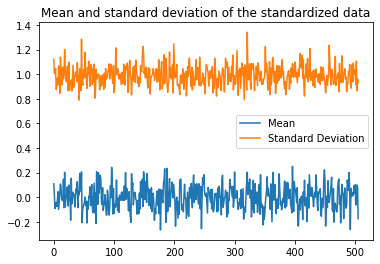

In [375]:
#Separation of the data frame in two.
X = []
for i in range(100):
    X.append(data['X'+str(i)])

X = np.transpose(X)
Y = data['Y']

#Separation of the covariates betwwen the trainset and the testset.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#We standardize the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = y_train-np.mean(Y)
y_test = y_test-np.mean(Y)


mean,std = [],[]
for i in range(len(X_train)):
    mean.append(np.mean(X_train[i]))
    std.append(np.std(X_train[i]))

for i in range(len(X_test)):
    mean.append(np.mean(X_test[i]))
    std.append(np.std(X_test[i]))

Indices = [i for i in range(len(X_test) + len(X_train))]

plt.plot(Indices,mean, label = "Mean")
plt.plot(Indices,std, label = "Standard Deviation")
plt.title("Mean and standard deviation of the standardized data")
plt.legend()
plt.show()

Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to standardize the data, the variables to avoid giving too much weight in the calculus of the Mean Squared Error (MSE) to isolated points besides we have seen that it gives the same OLS and predictor (without the intercept though).

In [376]:
#Creation of two empty dataframes
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

**Question 2 : Computation of the determination coefficients and MSE**


In [377]:
#The data is centered then by definition :

def mean_squared_error(Y,Y_pred):
    return np.mean((Y - Y_pred)**2)

def determination_coef(Y,Y_pred):
    Y_bar = np.mean(Y)
    SSE = np.sum((Y-Y_pred)**2)
    SST = np.sum((Y - Y_bar)**2)
    det_coef = 1-(SSE/SST)
    return det_coef

**Question 3 : Linear regression model**

In [378]:
#We apply the linear regression of the sklearn library to the train data.
lin_reg = LinearRegression().fit(X_train, y_train)

#We print the determination coefficient and the MSE of the test data
print("Determination Coefficient =" , determination_coef(y_test,lin_reg.predict(X_test)))
print("Mean Squared Error = " , mean_squared_error(y_test,lin_reg.predict(X_test)))

Determination Coefficient = 0.636846865711393
Mean Squared Error =  30.086304357015543


In [379]:
#We add a column named OLS to the test dataframe that contains the predicted values for the next sample and a column named OLS 
#to the coefficent dataframe that contains the estimated coefficients for the OLS estimator.

df_test["OLS"] = lin_reg.predict(X_test)
df_coef["OLS"] = lin_reg.coef_

**Question 4 : Covariance Matrix of the Covariates**

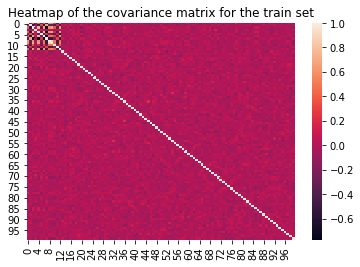

In [380]:
#Plot of the heatmap
cov_Mat = pd.DataFrame.cov(pd.DataFrame(X_train))
sns.heatmap(cov_Mat)
plt.title('Heatmap of the covariance matrix for the train set')
plt.show()

#SVD of the covariance matrix
U,s,V = np.linalg.svd(cov_Mat)

In [381]:
#Display of the covariance Matrix and its dimensions
print(cov_Mat)
print(np.shape(cov_Mat))

          0         1         2         3         4         5         6   \
0   1.002646 -0.203472  0.402418 -0.048440  0.412190 -0.212912  0.364434   
1  -0.203472  1.002646 -0.538123 -0.045144 -0.519643  0.315302 -0.580282   
2   0.402418 -0.538123  1.002646  0.039650  0.764643 -0.400601  0.653805   
3  -0.048440 -0.045144  0.039650  1.002646  0.073000  0.129252  0.053030   
4   0.412190 -0.519643  0.764643  0.073000  1.002646 -0.306231  0.745953   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.007839  0.019453 -0.020785 -0.077238  0.030404 -0.054445  0.044739   
96 -0.068108 -0.032104 -0.013412 -0.030418 -0.020598 -0.035271 -0.041746   
97  0.070132  0.004178  0.032993  0.042864  0.019310 -0.001924  0.032508   
98  0.067888 -0.026842 -0.034656 -0.027692 -0.026911  0.024851  0.052246   
99 -0.099549  0.022034 -0.102955  0.081075 -0.093187  0.037604 -0.070521   

          7         8         9   ...        90        91        92        93  \
0  -0.

**Question 5 : Principal Components Analysis (PCA)**

[6.48099261 2.17093742 2.09051172 2.00219404 1.98316216 1.92710048
 1.89280442 1.84618931 1.83156684 1.75766151 1.73251155 1.71050041
 1.67046669 1.66134808 1.63672726 1.56795131 1.55183656 1.53390368
 1.50538227 1.47133122 1.43916582 1.40774194 1.39302598 1.36717045
 1.35557629 1.3323791  1.31221448 1.29691036 1.26728193 1.23875167
 1.21559197 1.19140911 1.17310341 1.15133835 1.14299148 1.13384325
 1.11294718 1.09443151 1.09060372 1.07724512 1.04865429 1.02939186
 1.00584594 0.98575384 0.96068546 0.9454939  0.93269978 0.91851511
 0.88820866 0.87877717 0.85969053 0.84675838 0.83588573 0.82406367
 0.80412734 0.78286443 0.76423701 0.75641911 0.73650331 0.725954
 0.71544622 0.69597073 0.67840182 0.67643254 0.65407399 0.64755293
 0.6429144  0.62389844 0.60568455 0.60028181 0.59651062 0.58245877
 0.57106898 0.54896125 0.52531429 0.51365868 0.51013227 0.50675747
 0.49317419 0.4725191  0.45814107 0.4450832  0.43139105 0.42255323
 0.4158555  0.39209789 0.38246832 0.36475767 0.34373303 0.328173

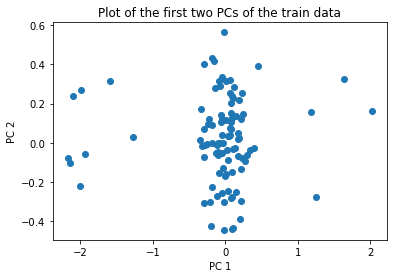

In [382]:
#We work on Us to compute the PCs to keep the data that have the biggest variances.
Us = U @ np.diag(s)
print(s)

#Plot of the first two PCs of the train data
plt.figure()
plt.scatter(Us[:,0],Us[:,1]) #We use the first 2 columns in Us
plt.title('Plot of the first two PCs of the train data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

**Question 6 : PCA before OLS**

In [383]:
# Compute projected data for both the train and the test data
X_train_projected = X_train@ U[:,:2]
X_test_projected = X_test@ U[:,:2]

#Linear regression applied to the low dimensional data
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_projected, y_train)

#Display of the determination coefficient and the MSE for the test data 

print("Determination coefficient =",determination_coef(y_test,lin_reg.predict(X_test_projected)))
print("MSE =",mean_squared_error(y_test,lin_reg.predict(X_test_projected)))

df_test['pca_ols'] = lin_reg.predict(X_test_projected)

Determination coefficient = 0.34177595372297753
MSE = 54.53217147689108


**Question 7 :  Absolute values of the loadings**

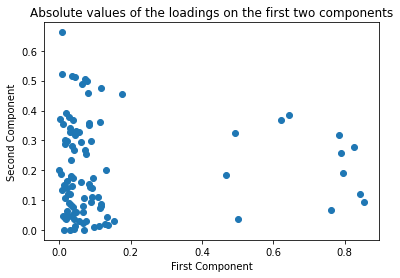

In [384]:
#Computation of the absolute values of the loadings on the two first principal components and plot.
Phi_1 = np.abs(np.sqrt(s[0])*U[:,0])
Phi_2 = np.abs(np.sqrt(s[0])*U[:,1])

plt.figure()
plt.scatter(Phi_1,Phi_2)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Absolute values of the loadings on the first two components")
plt.show()

**Question 8 : Lasso model**

In [385]:
#Apply the LassoCV of the sklearn library.
linreg = linear_model.LassoCV(alphas= np.logspace(0.001, 10, num=30))
linreg.fit(X_train, y_train)

#Display of the determination coefficient and the MSE of the test data and the regularization parameter.
print("Determination Coefficient Lasso = ", determination_coef(y_test , linreg.predict(X_test)))
print("MSE Lasso = ", mean_squared_error(y_test , linreg.predict(X_test)))
print("Regularization parameter Lasso = ", linreg.alpha_)

#We then add the predictions to the dataframe.
df_test['Lasso'] = linreg.predict(X_test)
df_coef['Lasso'] = linreg.coef_

Determination Coefficient Lasso =  0.6458373533745048
MSE Lasso =  29.341465547678947
Regularization parameter Lasso =  1.0023052380778996


**Question 9 : Ridge Model**

In [386]:
#apply the RidgeCV of the sklearn library.
linreg = linear_model.RidgeCV(alphas=np.logspace(0.001, 10, num=30))
linreg.fit(X_train, y_train)

#Display of the determination coefficient and the MSE of the test data and the regularization parameter.
print("Determination Coefficent Ridge =", determination_coef(y_test,linreg.predict(X_test)))
print("MSE Ridge =", mean_squared_error(y_test,linreg.predict(X_test)))
print("Regularization parameter Ridge =", linreg.alpha_)

#We then add the predictions to the dataframe.
df_test['Ridge'] = linreg.predict(X_test)
df_coef['Ridge'] = linreg.coef_

Determination Coefficent Ridge = 0.6684454773329374
MSE Ridge = 27.468440550422653
Regularization parameter Ridge = 53.08422939523869


**Question 10 : Forward variable selection**

We implement the algorithm given in the lecture notes :

In [387]:
def forward_variable_selection(Y,X):
    #Initialisation
    n,res,Select = len(Y),Y,[]
    I = [i for i in range(len(X[0]))]
    ordered_var = [] #To provide the order of the variable selection
    
    while len(I) != 0:
        temp,stats = [],[]
        
        for i in I:
            reg = linear_model.LinearRegression()
            reg.fit(X[:,i].reshape(-1,1), res)
            
            sigma_n = (np.sum((res-reg.predict(X[:,i].reshape(-1,1)))**2))/(n-2)
            Graam_n = (np.sum(X[:,i]**2))/n
            s_n = Graam_n**(-1)
            
            T = np.sqrt(n)*abs(reg.coef_)/np.sqrt(sigma_n*s_n)
            stats.append([T,i])
            temp.append(T)
            
        i_max = stats[np.argmax(temp)][1]
        Select.append(i_max)
        
        res -= reg.predict(X[:,i_max].reshape(-1,1))  #Actualisation of the residual
        
        I.remove(i_max)
        ordered_var.append(temp)
            
    return Select , ordered_var
    


**Question 11 : Forward variable selection with a stopping criterion**

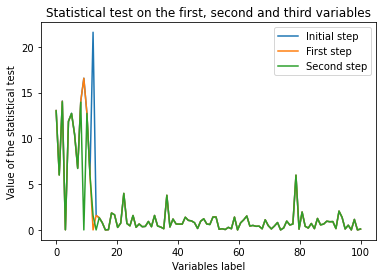

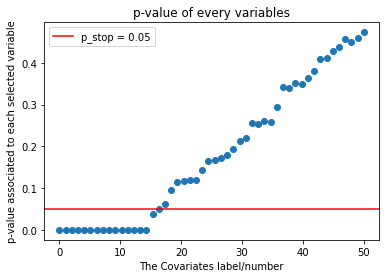

List of the selected variables = [12, 9, 2, 8, 0, 5, 10, 4, 6, 7, 78, 1, 11, 22, 36, 92]


In [393]:
#Gaussian model p-value
def p_value_gaussian(T,p,n):
    p_value = 2 * t.sf(T,n-p-1)
    return p_value

def forward_variable_selection_with_stopping_criterion(Y,X,p_stop):
    covariates_index,test_stats = forward_variable_selection(Y,X)
    test_stats_result = [test_stats[0]]
    p_values , selected_variables = [[],[]] , []
    
    for i in range(1,len(covariates_index)):
        T = max(test_stats[i-1])
        
        p_val = p_value_gaussian(T,len(X[0]),len(X))
        p_values[0].append(p_val)
        p_values[1].append(covariates_index[i-1])
        
        if (p_val < p_stop):
            test_stats_result.append(test_stats[i])
            selected_variables.append(covariates_index[i-1])
        
        for j in range(1,i+1):
            test_stats[i].insert(covariates_index[j-1],0)
    return test_stats_result , p_values , selected_variables

#Illustration of the method : we choose to stop if the p-value is larger than 0.05 so p_stop=0.05
#(i)

test_stats , p_values , selected_variables = forward_variable_selection_with_stopping_criterion(y_train,X_train,0.05)

plt.figure()
absc = np.linspace(0,100, 100)
plt.plot(absc , test_stats[0] , label='Initial step')
plt.plot(absc , test_stats[1] , label='First step')
plt.plot(absc , test_stats[2] , label ='Second step')
plt.xlabel('Variables label')
plt.ylabel('Value of the statistical test')
plt.title('Statistical test on the first, second and third variables')
plt.legend()
plt.show()

#(ii) The graphs of the first 50 p-values (each associated to a selected variable).On the same plot, trace the horizontal
# line with the ordinate 0.05.
plt.figure()
plt.scatter(np.linspace(0,50, 50) , p_values[0][:50])
plt.title('p-value of every variables')
plt.xlabel('The Covariates label/number')
plt.ylabel('p-value associated to each selected variable')
plt.axhline(y=0.05 , color = 'red' , label = 'p_stop = 0.05') #We display the limit in red between p<0.05 and p>0.05
plt.legend()
plt.show()

#(iii) Provide the list of the selected variables
print('List of the selected variables =' , selected_variables)

**Question 12 : OLS on the selected variables**

In [389]:
lin_reg = linear_model.LinearRegression()

X_train_selvar , X_test_selvar = X_train[:,selected_variables[0]] , X_test[:,selected_variables[0]]

for i in range(len(selected_variables)):
    X_train_selvar = np.column_stack((X_train_selvar,X_train[:,selected_variables[i]]))
    X_test_selvar = np.column_stack((X_test_selvar,X_test[:,selected_variables[i]]))

lin_reg.fit(X_train_selvar, y_train)
prediction = lin_reg.predict(X_test_selvar)

#Print the determination coefficient and the MSE of the test data
print("Determination Coefficient = ",determination_coef(y_test,prediction))
print("MSE = ",mean_squared_error(y_test,prediction))

#Add a column named FVS to the df_coef dataframe that contains the estimated coefficients.
df_test['FVS'] = prediction

coefficients = 100*[0] #We initialize the coefficients list.

for i in range(len(selected_variables)):
    coefficients[selected_variables[i]] = lin_reg.coef_[i]

df_coef['FVS'] = coefficients

Determination Coefficient =  0.14747123247938854
MSE =  70.62981852815898


**Question 13 : Summary of the results of all the methods**

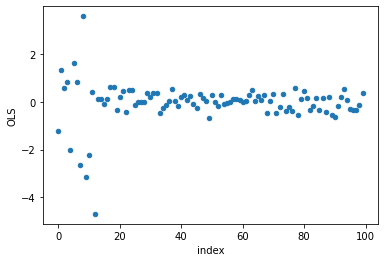

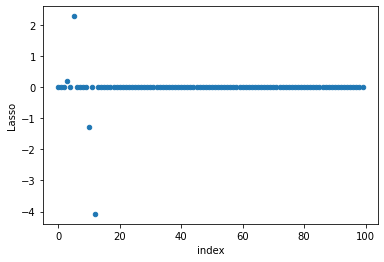

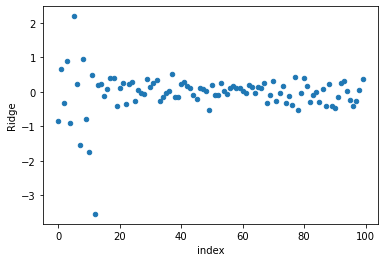

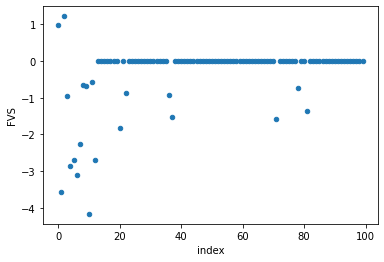

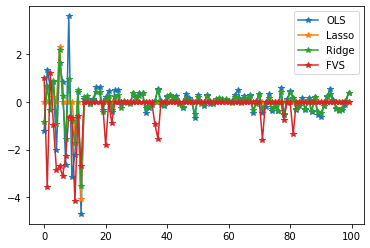

In [390]:
#Sometimes we get extreme points and the plot is unreadable if that's the case please reload to get a normal graph.
for i in range(len(df_coef.columns)):
    df_coef.reset_index().plot(kind ='scatter' , x ='index' , y = df_coef.columns[i])

df_coef.plot(marker = '*') # We are asked to use markers instead of lines

**Question 14: Set coefficients to zero**

In [391]:
n_OLS = len(df_coef['OLS'].loc[df_coef['OLS'] == 0])
n_Lasso = len(df_coef['Lasso'].loc[df_coef['Lasso'] == 0])
n_Ridge = len(df_coef['Ridge'].loc[df_coef['Ridge'] == 0])
n_FVS = len(df_coef['FVS'].loc[df_coef['FVS'] == 0])

print("Number of coefficients set to 0 in the OLS method =", n_OLS)
print("Number of coefficients set to 0 in the Lasso method =",n_Lasso)
print("Number of coefficients set to 0 in the Ridge method =",n_Ridge)
print("Number of coefficients set to 0 in the FVS method =",n_FVS)

Number of coefficients set to 0 in the OLS method = 0
Number of coefficients set to 0 in the Lasso method = 95
Number of coefficients set to 0 in the Ridge method = 0
Number of coefficients set to 0 in the FVS method = 80


**Question 15 : New prediction**

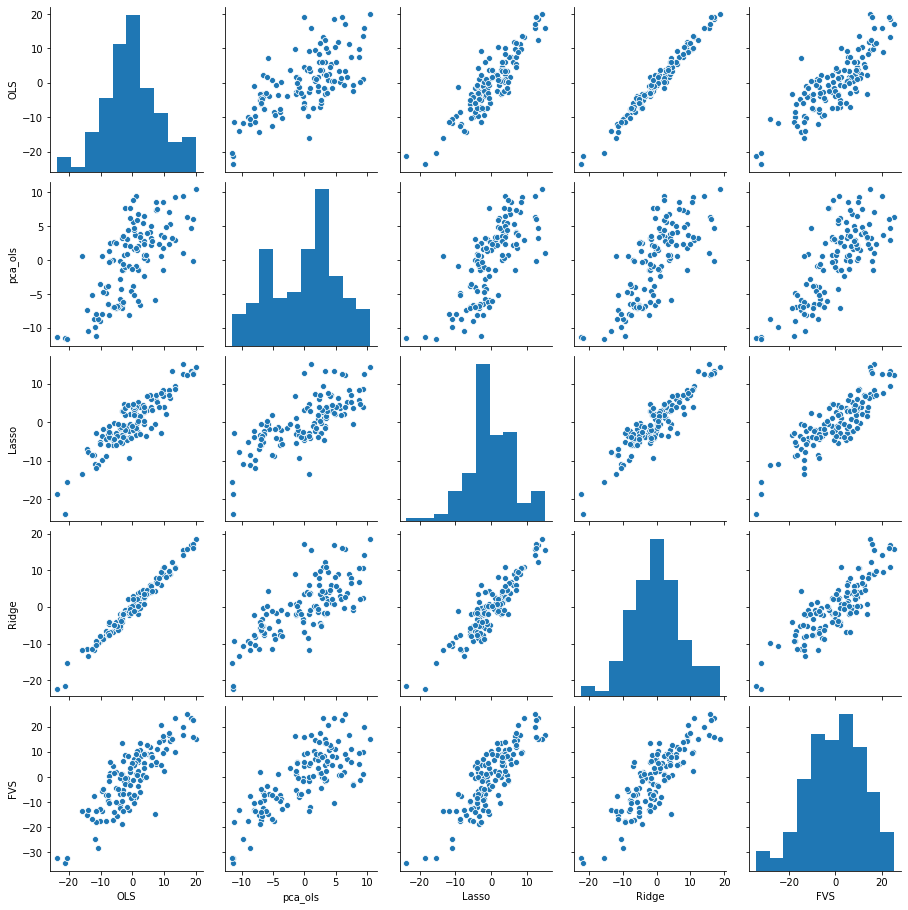

In [392]:
sns.pairplot(df_test)